In [44]:
import numpy
import requests
from bs4 import BeautifulSoup
url = "http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168"

In [45]:
page = requests.get("https://www.nytimes.com/books/best-sellers/")
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="main")
items = seven_day.find_all(class_="trending")
tonight = items[0]
print(tonight.prettify())

<li class="trending ">
 <article class="book" itemscope="" itemtype="https://schema.org/Book">
  <header class="book-header">
   <div class="thumb">
    <img onerror="this.src='https://s1.nyt.com/du/books/images/default-image.png'" role="presentation" src="https://s1.nyt.com/du/books/images/9780385543989.jpg"/>
   </div>
  </header>
  <div class="book-body">
   <p class="freshness">
    New this week
   </p>
   <h3 class="title" itemprop="name">
    DARKER
   </h3>
   <p class="author" itemprop="author">
    by E. L. James
   </p>
   <p class="description" itemprop="description">
    Christian Grey's tormented and difficult pursuit of Anastasia Steele is told from his perspective.
   </p>
  </div>
 </article>
 <ul class="action-menu">
  <li class="buy-item">
   <button class="button buy-button is-desktop" data-amazon="https://www.amazon.com/Darker-Fifty-Shades-Told-Christian-ebook/dp/B07693HRS9?tag=NYTBS-20" data-author="by E. L. James" data-barnesandnoble="http://www.anrdoezrs.net/cli

In [46]:
name = tonight.find(class_="title").get_text()
print(name)
author = tonight.find(class_="author").get_text()
print(author)
description = tonight.find(class_="description").get_text()
print(description)

DARKER
by E. L. James
Christian Grey's tormented and difficult pursuit of Anastasia Steele is told from his perspective.


In [52]:
book_list = seven_day.select(" .trending .title")
titles = [pt.get_text().lower() for pt in book_list]
book_desc = seven_day.select(" .trending .description")
desc = [pt.get_text() for pt in book_desc]
book_author = seven_day.select(" .trending .author")
authors = [pt.get_text() for pt in book_author]
book_fresh = seven_day.select(" .trending .freshness")
fresh = [pt.get_text() for pt in book_fresh]
book_subc = seven_day.select(" #main .subcategory-heading-link")
subc = [pt.get_text() for pt in book_subc]
subc


In [56]:
import pandas as pd
best_sellers = pd.DataFrame({
    "title" : titles,
    "authors" : authors,
    "description" : desc,
    "freshness": fresh
})


In [63]:
import nltk
#nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('English')
stop[:30]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what']

In [80]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("\w+")
#desc = [str(desc_r) for desc_r in desc]

desc_toke = []
for pt in desc:
    pt.encode("utf-8")
    desc_toke.append(tokenizer.tokenize(pt))

desc_uniq = []

for words in desc_toke:
    
    if not words in stop:
        
        desc_uniq.append(words)
desc_uniq = [str(desc_u) for desc_u in desc_uniq  ]
desc_uniq[:3]

["[u'Christian', u'Grey', u's', u'tormented', u'and', u'difficult', u'pursuit', u'of', u'Anastasia', u'Steele', u'is', u'told', u'from', u'his', u'perspective']",
 "[u'Three', u'students', u'at', u'a', u'sleazy', u'for', u'profit', u'law', u'school', u'hope', u'to', u'expose', u'the', u'student', u'loan', u'banker', u'who', u'runs', u'it']",
 "[u'A', u'symbology', u'professor', u'goes', u'on', u'a', u'perilous', u'quest', u'with', u'a', u'beautiful', u'museum', u'director']"]

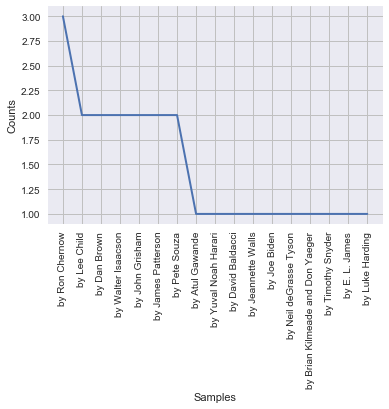

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#To save the plot within the notebook itself
sns.set()
freqDist = nltk.FreqDist(authors)
freqDist.plot(25)